In [2]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
print("Nombre total de Titres : ", len(df))

Nombre total de Titres :  7787


In [4]:
print("L'année comptant le plus de films est : ", df["release_year"].value_counts().idxmax())

L'année comptant le plus de films est :  2018


In [17]:
print("Les 10 pays qui produisent les plus de films sont :\n\n",df['country'].value_counts().head(10).to_string())

Les 10 pays qui produisent les plus de films sont :

 United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100


In [31]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_int'] = movies['duration'].str.replace(' min', '', regex=False).astype(int)
movies.sort_values(by='duration_int', ascending=False).head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312
6850,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,253
4490,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,237
3694,s3695,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,"May 21, 2020",1982,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,233
5108,s5109,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",NaN,"May 21, 2020",1984,TV-14,230 min,"Comedies, Dramas, International Movies",When robberies and murders targeting women swe...,230


In [35]:
# 1. On garde uniquement les films
movies_df = df[df['type'] == 'Movie'].copy()

# 2. On supprime le ' min' et convertit en entier
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(int)

# 3. Afficher les 5 premières lignes
print(movies_df[['title', 'duration', 'duration_minutes']].head())

print("Statistiques de durée des films :")
print(movies_df['duration_minutes'].describe())

   title duration  duration_minutes
1   7:19   93 min                93
2  23:59   78 min                78
3      9   80 min                80
4     21  123 min               123
6    122   95 min                95
Statistiques de durée des films :
count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_minutes, dtype: float64


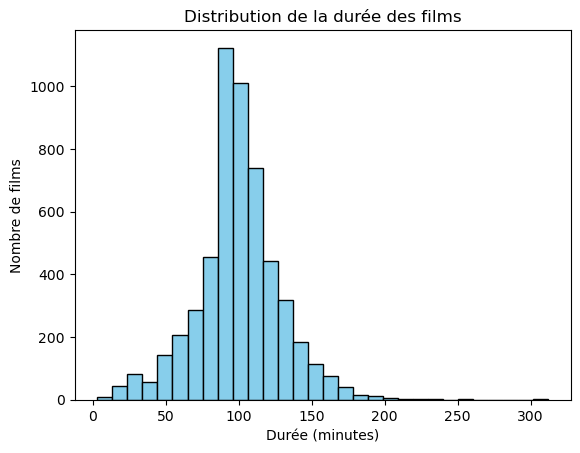

In [36]:
import matplotlib.pyplot as plt

plt.hist(movies_df['duration_minutes'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution de la durée des films")
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de films")
plt.show()
